# k-Means Clustering

We will import all the neccessary libraries first.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's generate a two-dimensional dataset containing four distinct blobs. To emphazie that this is unsupervised learning algorithm, we will leave the labels out of the visualization. 

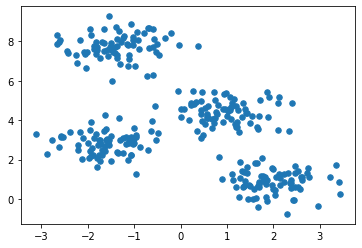

In [9]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 300, centers = 4, 
                  cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s=30)   # s is the size of the data points in the plot

By, eye it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

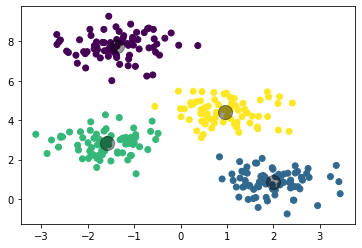

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X,y)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s = 200, alpha = 0.4)      # alpha is the transprancy

k-Means algorithm assigns the points to clusters very similarly to how we might assign them by eye. We are going to use the k-means algorithm that we discussed in the handwritten notes (pdf).

\begin{equation}
\begin{split}
\text{begin} &\{\\
\text{for }& i = 1 \text{ to }m\\
& c^{(i)} := \text{ index (from 1 to K) of cluster centriod closest to }x^{(i)}\\
\text{for }& k = 1 \text{ to }K\\
& \mu_{k} := \text{ average (mean) of points assigned to cluster k}\\
\}
\end{split}
\end{equation}

Most well-tested implementation will do a bit more than this under the hood, but the above function gives a gist of the 2-step algorithm.

# Cons of this 2-step k-means algorithm

**The Global optimal result may not be achieved**. Like written in handwritten notes, this approch to the algorithm will gurantee improvements of results in each step, but there is noassurance that it will lead to the global best solution. For example the following:

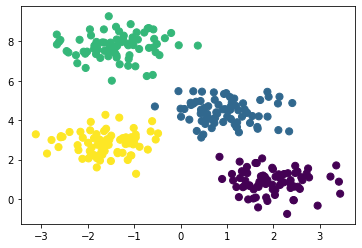

In [18]:
labels = KMeans(4, n_init = 1, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels,
            s=50, cmap = 'viridis')

We can conclude seeing the above plot that the algorithm has not converged gloablly. 

We discussed in the handwritten notes that to aviod this type of error, and to improve our results, we run the algorithm a few things and choose the best model generated.

In Scikit-learn, this can be achieved by using the *n_init* parameter. The default value of this is 10.

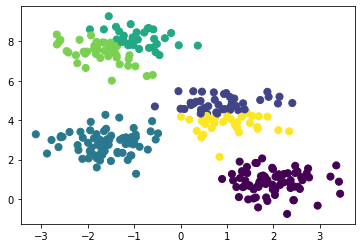

In [ ]:
labels = KMeans(6, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels,
            s=50, cmap = 'viridis')

## k-means is limited to linear cluster boundaries

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the cluster have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approch:

In [20]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = 0.05, random_state=0)

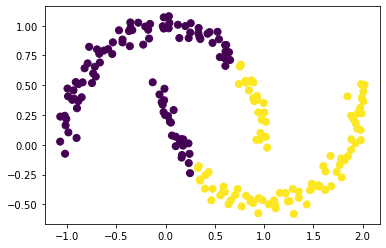

In [21]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c= labels,
            s=50, cmap = 'viridis')

This situation is similar to the Support Vector Machines, where we used kernel transformation to project the data into a higher dimension where a linear separation is possible. We can imagine using the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-learn within the **SpectralClustering** estimator. It uses the graph of nearest neighbors to compute a higher dimesional representation of the data, and then assigns labels using a k-means algorithm:

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


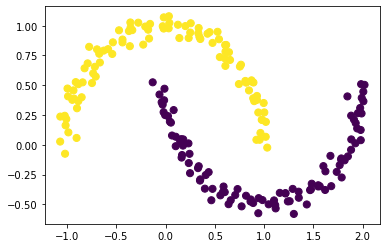

In [22]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap = 'viridis')

We can see that how kernelization does the trick to classify the data in higher dimensions.

## k-means can be slow for larger number of samples

Because the algorithm needs to access every point in the dataset at every step, it can be relatively slow as the number of samples grow. 